# 1. Look at the big picture

## 1.1 Frame the problem

**The task/problem**<br>
Box office blabla

**The goal**<br>
To get good predictions blbllblb

**Solution to the problem**<br>
nvfewdc

## 1.2 Select performance measure

It is important to have a way of measuring the performance of the model. There are many different ways of measuring performance, but for this problem we chose the Root Mean Square Error(RMSE). This method measures the standard deviaton of the errors and is widly used as a performance metric with regression problems.

$ RMSE (X, h) = \sqrt{(\frac{1}{m})\sum_{i=1}^{m}(h(x^{i}) - y^{i})^{2}} $

- m: number of instances in the dataset you are measuring the RMSE on. <br>
- $ x^{i} $ : vector of all the feature values (excluding the label) of the ith instance in
the dataset, and $ y^{i} $) is its label (the desired output value for that instance).<br>
- X: matrix containing all the feature values (excluding labels) of all instances in
the dataset.<br>
- h: the system’s prediction function, also called a hypothesis.<br>
- RMSE(X,h) is the cost function measured on the set of examples using your
hypothesis h.

# 2 Get the data

## 2.1 Setup

In [422]:
#To display plots directly in the notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import ast

# To make the notebook reproducible
seed = 42
np.random.seed(seed)

## 2.2 Importing the data

Here we list the files found in the data folder.

In [423]:
import os
print(os.listdir("data"))

['sample_submission.csv', 'test.csv', 'train.csv']


The train.csv file is the one we will use to train, validate and test our model. <br><br>
By using Pandas we create DataFrames containing the datasets.

In [424]:
films = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## 2.2 Taking a look at the data

To get a quick overview of the data we can use the head() function. 

In [425]:
films.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Here we see that some of the columns contains dictionaries. These will have to be explored further.<br><br>
To get more info on the dataset we use the info() method

In [426]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

From this we see that there are 23 attributes of various type. Most of them are objects, but there are some ints and floats. We can also see that there are 3000 entries, which is a bit few for ML standards, and some of the attributes have fewer non null values. <br><br>
From the table below we can see the count, mean, standard deviation as well as the minimun, 25%, 50%, 75% and max entry. (This is only done with the numerical attributes).<br>
The id column is not important here.

In [427]:
films.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [428]:
films.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [429]:
test.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [430]:
target = films['revenue'].copy()

We will drop some of the more unnecessary columns, such as id, homepage, imdb_id, overview, poster path, status and tagline.

In [431]:
dropping = ['id', 'homepage', 'imdb_id', 'overview', 'poster_path', 'status', 'tagline', 'title', 'original_title', 'Keywords']

films = films.drop(dropping, axis=1)
test = test.drop(dropping, axis=1)

In [432]:
films.head()

,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]","[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


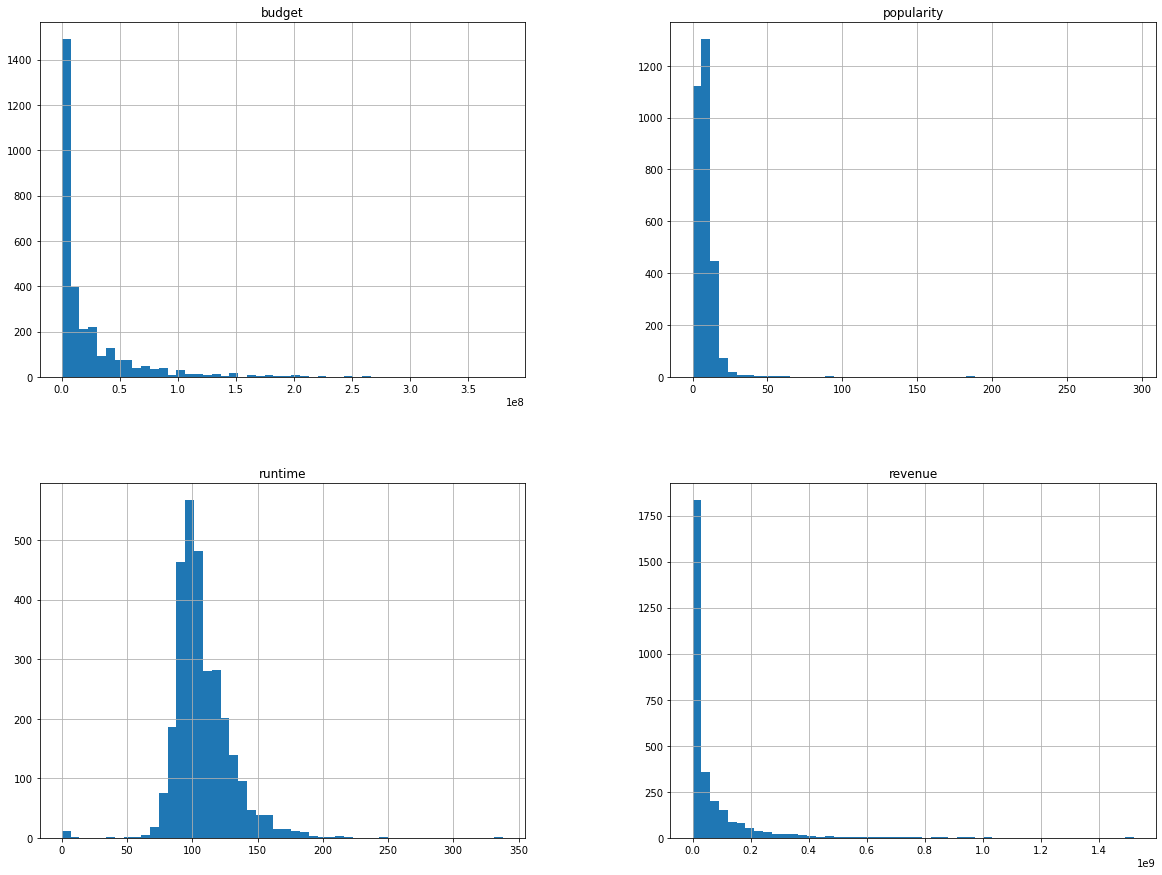

In [433]:
films.hist(bins=50, figsize=(20,15))
plt.show()

We see that both the revenue and budget is very skewed. So lets look at the log of the revenue

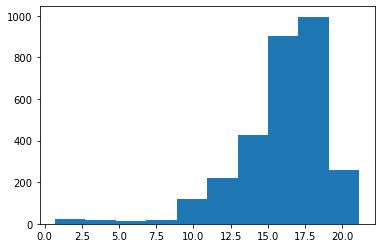

In [434]:
plt.hist(np.log1p(films['revenue']))
plt.show()

Lets look closer at the budget vs revenue

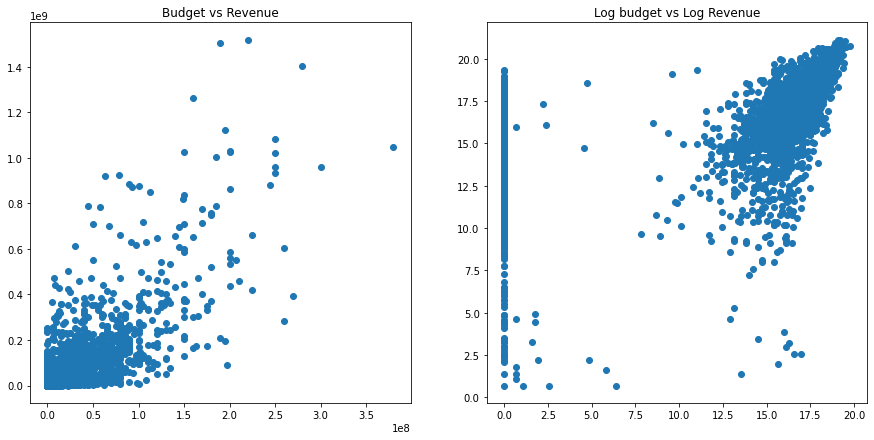

In [435]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.scatter(films['budget'], films['revenue'])
plt.title('Budget vs Revenue')
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(films['budget']), np.log1p(films['revenue']))
plt.title('Log budget vs Log Revenue')
plt.show()

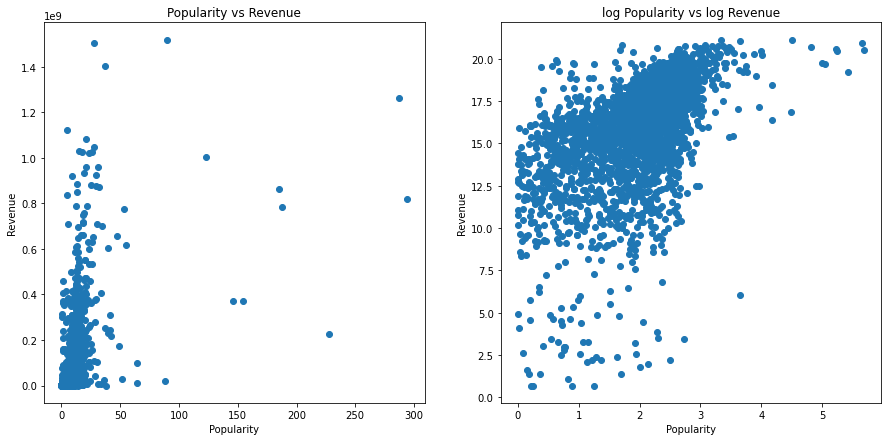

In [436]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.scatter(films['popularity'], films['revenue'])
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(films['popularity']), np.log1p(films['revenue']))
plt.title('log Popularity vs log Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

### Looking at the dictionaries

#### Belongs_to_collection

The first column with dictionaries is the belongs_to_collection column. Not all instances will have a non null value here, from the table above we see that only 604 have.

In [437]:
print(films['belongs_to_collection'][0:5])

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object


The most interesting thing from the belongs_to_collection may be if the movie is in a series.

In [438]:
films['has_collection'] = np.where(pd.notnull(films['belongs_to_collection']), 1, 0)
test['has_collection'] = np.where(pd.notnull(test['belongs_to_collection']), 1, 0)

films = films.drop(['belongs_to_collection'], axis=1) 
test = test.drop(['belongs_to_collection'], axis=1) 

In [439]:
films['has_collection'][:5]

0    1
1    1
2    0
3    0
4    0
Name: has_collection, dtype: int32

#### Genre 

In [440]:
films['genres'] = films['genres'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else ['None']))
test['genres'] = test['genres'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else ['None']))

In [441]:
films['genres'].head(5)

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genres, dtype: object

In [442]:
films['num_genres'] = films['genres'].apply(lambda x: len(x) if x != {} else 0)
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
films['num_genres'].head()    

0    1
1    4
2    1
3    2
4    2
Name: num_genres, dtype: int64

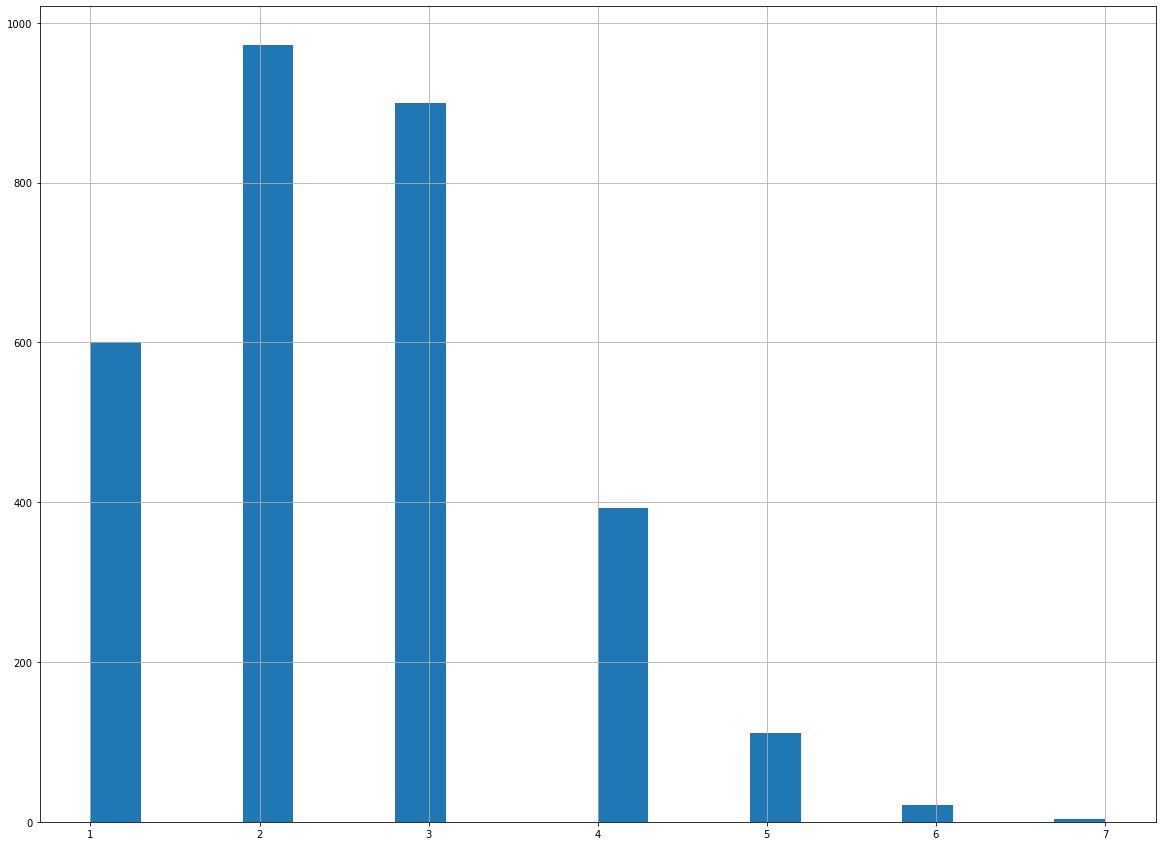

In [443]:
films['num_genres'].hist(bins=20, figsize=(20,15))
plt.show()

In [444]:
films['num_genres'].value_counts()

2    972
3    900
1    600
4    393
5    111
6     21
7      3
Name: num_genres, dtype: int64

#### Cast

In [445]:
films['cast'][1]

'[{\'cast_id\': 1, \'character\': \'Mia Thermopolis\', \'credit_id\': \'52fe43fe9251416c7502561f\', \'gender\': 1, \'id\': 1813, \'name\': \'Anne Hathaway\', \'order\': 0, \'profile_path\': \'/jUMOKwSUBnTcMeN1HfhutiY49Ad.jpg\'}, {\'cast_id\': 2, \'character\': \'Queen Clarisse Renaldi\', \'credit_id\': \'52fe43fe9251416c75025623\', \'gender\': 1, \'id\': 5823, \'name\': \'Julie Andrews\', \'order\': 1, \'profile_path\': \'/6t61jkmfSA6nbYRCKR9s97CgUN6.jpg\'}, {\'cast_id\': 3, \'character\': \'Joe\', \'credit_id\': \'52fe43fe9251416c75025627\', \'gender\': 2, \'id\': 1210, \'name\': \'H√©ctor Elizondo\', \'order\': 2, \'profile_path\': \'/48UNfVFZVr0jyMIlLPhzm8IIM7f.jpg\'}, {\'cast_id\': 4, \'character\': \'Viscount Mabrey\', \'credit_id\': \'52fe43fe9251416c7502562b\', \'gender\': 2, \'id\': 655, \'name\': \'John Rhys-Davies\', \'order\': 3, \'profile_path\': \'/zZ67PuoFfik9QlZyfaEsFBC1yVJ.jpg\'}, {\'cast_id\': 5, \'character\': \'Lilly Moscovitz\', \'credit_id\': \'52fe43fe9251416c7502

The most interresting with the cast is the names of the actors.

In [446]:
films['cast'] = films['cast'].apply(lambda x: list(map(lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else ['None']))
test['cast'] = test['cast'].apply(lambda x: list(map(lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else ['None']))

In [447]:
films['cast'].head()

0    [Rob Corddry, Craig Robinson, Clark Duke, Adam...
1    [Anne Hathaway, Julie Andrews, H√©ctor Elizond...
2    [Miles Teller, J.K. Simmons, Melissa Benoist, ...
3    [Vidya Balan, Nawazuddin Siddiqui, Parambrata ...
4    [Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...
Name: cast, dtype: object

In [448]:
films['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts()

15     212
16     165
10     135
13     129
12     124
      ... 
90       1
88       1
84       1
82       1
134      1
Name: cast, Length: 109, dtype: int64

#### Crew

In [449]:
films['crew'][1]

"[{'credit_id': '52fe43fe9251416c7502563d', 'department': 'Directing', 'gender': 2, 'id': 1201, 'job': 'Director', 'name': 'Garry Marshall', 'profile_path': '/kx77E8p5rnEmKxIhFT0qWCEMEik.jpg'}, {'credit_id': '52fe43fe9251416c75025667', 'department': 'Camera', 'gender': 2, 'id': 1214, 'job': 'Director of Photography', 'name': 'Charles Minsky', 'profile_path': None}, {'credit_id': '52fe43fe9251416c75025661', 'department': 'Sound', 'gender': 2, 'id': 4500, 'job': 'Original Music Composer', 'name': 'John Debney', 'profile_path': '/hTrlvZlDXQk49nfc2BM9sjKfJv.jpg'}, {'credit_id': '52fe43fe9251416c7502564f', 'department': 'Production', 'gender': 1, 'id': 8851, 'job': 'Producer', 'name': 'Whitney Houston', 'profile_path': '/69ouDnXnmklYPr4sMJXWKYz81AL.jpg'}, {'credit_id': '52fe43fe9251416c7502566d', 'department': 'Editing', 'gender': 0, 'id': 12970, 'job': 'Editor', 'name': 'Bruce Green', 'profile_path': '/yplxWPVgwK1b33AjvbhM9mWX2Aw.jpg'}, {'credit_id': '52fe43fe9251416c75025655', 'department

In [450]:
films['crew'] = films['crew'].apply(lambda x: list(map(lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else ['None']))
test['crew'] = test['crew'].apply(lambda x: list(map(lambda d: list(d.values())[5], ast.literal_eval(x)) if isinstance(x, str) else ['None']))

In [451]:
films['crew'].head()

0    [Kelly Cantley, Steve Pink, Josh Heald, Josh H...
1    [Garry Marshall, Charles Minsky, John Debney, ...
2    [Terri Taylor, Richard Henderson, Jeffrey Stot...
3              [Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]
4                     [Jong-seok Yoon, Jong-seok Yoon]
Name: crew, dtype: object

#### Original language

In [452]:
films['original_language'].head()

0    en
1    en
2    en
3    hi
4    ko
Name: original_language, dtype: object

#### Production companies

Here the name of the production companies is the most important, and maybe the number of companies in one movie.

In [453]:
films['production_companies'].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                  NaN
4                                                  NaN
Name: production_companies, dtype: object

In [454]:
films['production_companies'] = films['production_companies'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else ['None']))
test['production_companies'] = test['production_companies'].apply(lambda x: list(map(lambda d: list(d.values())[0], ast.literal_eval(x)) if isinstance(x, str) else ['None']))

In [455]:
films['production_companies'].head()

0    [Paramount Pictures, United Artists, Metro-Gol...
1                               [Walt Disney Pictures]
2    [Bold Films, Blumhouse Productions, Right of W...
3                                               [None]
4                                               [None]
Name: production_companies, dtype: object

In [456]:
films['production_companies'].apply(lambda x: len(x) if x != [] else 0).value_counts()

1     931
2     734
3     582
4     312
5     166
6     118
7      62
8      42
9      29
11      7
10      7
12      3
15      2
16      2
13      1
14      1
17      1
Name: production_companies, dtype: int64

Most of the movies have 1 or 2 production companies, but there are also some that have none.

In [457]:
from collections import Counter
Counter([i for j in films['production_companies'] for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('None', 156),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23)]

#### Production countries

In [458]:
films['production_countries'].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

Again, we only want the name of the contry.

In [459]:
films['production_countries'] = films['production_countries'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else ['None']))
test['production_countries'] = test['production_countries'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else ['None']))

In [460]:
films['production_countries'].head()

0    [United States of America]
1    [United States of America]
2    [United States of America]
3                       [India]
4                 [South Korea]
Name: production_countries, dtype: object

In [461]:
Counter([i for j in films['production_countries'] for i in j]).most_common(30)

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('None', 55),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10),
 ('Hungary', 9),
 ('United Arab Emirates', 9),
 ('Austria', 8),
 ('Switzerland', 8)]

In [462]:
films['production_countries'].apply(lambda x: len(x) if x != [] else 0).value_counts()

1    2277
2     525
3     116
4      57
5      21
6       3
8       1
Name: production_countries, dtype: int64

Most films have only one production country, and most of them are in the US

#### Release date

There may be multiple interesting aspects of the release date. Which year it was released is of course important for the revenue, as the revenue tend to go up when the film is newer. But maybe the time of year the film is released or even the day of the week plays a role in the revenue?

In [463]:
films['release_date'].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [464]:
films[['release_month', 'release_day', 'release_year']] = films['release_date'].str.split('/', expand=True).replace(np.nan, -1).astype(int)
test[['release_month', 'release_day', 'release_year']] = test['release_date'].str.split('/', expand=True).replace(np.nan, -1).astype(int)

In [465]:
def fix_year(year):
    if year <= 19:
        return 2000 + year
    else:
        return 1900 + year

In [466]:
films['release_year'] = films['release_year'].apply(lambda x: fix_year(x))
test['release_year'] = test['release_year'].apply(lambda x: fix_year(x))

In [467]:
films['release_year']

0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
2995    1994
2996    2013
2997    1996
2998    2004
2999    2011
Name: release_year, Length: 3000, dtype: int64

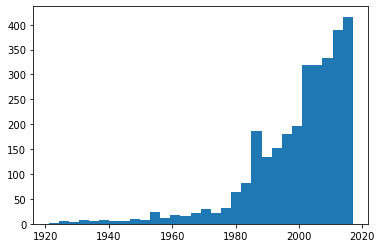

In [468]:
plt.hist(films['release_year'].sort_values(), bins = 30, align='mid')
plt.show()

In [469]:
films['day_of_week'] = pd.to_datetime(films['release_date']).dt.weekday

In [470]:
films['day_of_week']

0       4
1       4
2       4
3       4
4       3
       ..
2995    4
2996    3
2997    4
2998    4
2999    3
Name: day_of_week, Length: 3000, dtype: int64

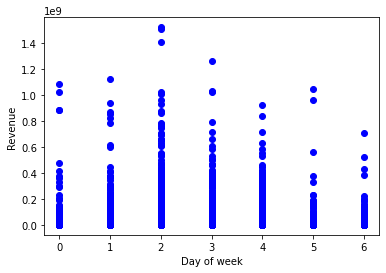

In [471]:
plt.plot(films['day_of_week'], films['revenue'], 'bo')
plt.xlabel('Day of week')
plt.ylabel('Revenue')
plt.show()

Where Monday is 0 and Sunday is 6

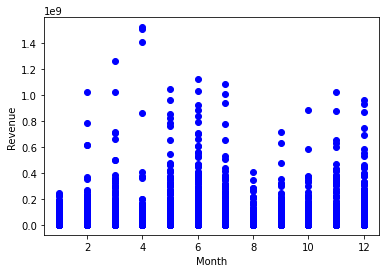

In [472]:
plt.plot(films['release_month'], films['revenue'], 'bo')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

#### Spoken Languages

In [473]:
films['spoken_languages'].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

Here we want either the iso code(ex. en for English) or the name of the language. Lets try the name first.

In [474]:
films['spoken_languages'] = films['spoken_languages'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else ['None']))
test['spoken_languages'] = test['spoken_languages'].apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else ['None']))

In [475]:
films['spoken_languages'].head()

0            [English]
1            [English]
2            [English]
3    [English, हिन्दी]
4            [한국어/조선말]
Name: spoken_languages, dtype: object

In [476]:
Counter([i for j in films['spoken_languages'] for i in j]).most_common(10)

[('English', 2618),
 ('Français', 288),
 ('Español', 239),
 ('Deutsch', 169),
 ('Pусский', 152),
 ('Italiano', 124),
 ('日本語', 89),
 ('普通话', 68),
 ('हिन्दी', 56),
 ('', 47)]

### Filling in Non Values

There are multiple instances that have missing features. And most Machine Learning Algorithms and models cant work with that. We will try to set the missing values to some value, either None or the median, or if there is just one missing in a feature, maybe we can find it online.

In [477]:
films.isna().sum()

budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 2
spoken_languages        0
cast                    0
crew                    0
revenue                 0
has_collection          0
num_genres              0
release_month           0
release_day             0
release_year            0
day_of_week             0
dtype: int64

In our train set there is only one feature that has a non value now, runtime. This is because we have transformed most of the features which has filled in most of the missing values. We will fill in the missing values with the median using SimpleImputer

In [478]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
films['runtime'] = imp_median.fit_transform(films[['runtime']])
imp_median.statistics_

array([104.])

In [479]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3000 non-null   int64  
 1   genres                3000 non-null   object 
 2   original_language     3000 non-null   object 
 3   popularity            3000 non-null   float64
 4   production_companies  3000 non-null   object 
 5   production_countries  3000 non-null   object 
 6   release_date          3000 non-null   object 
 7   runtime               3000 non-null   float64
 8   spoken_languages      3000 non-null   object 
 9   cast                  3000 non-null   object 
 10  crew                  3000 non-null   object 
 11  revenue               3000 non-null   int64  
 12  has_collection        3000 non-null   int32  
 13  num_genres            3000 non-null   int64  
 14  release_month         3000 non-null   int32  
 15  release_day          

In [480]:
test.isna().sum()

budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            1
runtime                 4
spoken_languages        0
cast                    0
crew                    0
has_collection          0
num_genres              0
release_month           0
release_day             0
release_year            0
dtype: int64

In [489]:
films[['release_month', 'release_day' ,'release_year']].describe()

,release_month,release_day,release_year
count,3000.000000,3000.000000,3000.000000
mean,6.775333,15.046333,1999.713000
std,3.409115,8.632981,15.423313
min,1.000000,1.000000,1921.000000
25%,4.000000,8.000000,1993.000000
50%,7.000000,15.000000,2004.000000
75%,10.000000,22.000000,2011.000000
max,12.000000,31.000000,2017.000000


In [482]:
test['release_date'].fillna('7/15/04', inplace=True)

Fixing the replaced date in the test set. 

In [483]:
test[['release_month', 'release_day', 'release_year']] = test['release_date'].str.split('/', expand=True).replace(np.nan, -1).astype(int)
test['release_year'] = test['release_year'].apply(lambda x: fix_year(x))

Replacing missing values with

In [486]:
test['runtime'] = imp_median.fit_transform(test[['runtime']])
imp_median.statistics_

array([104.])

## 2.3 Handling non numeric objects